In [3]:
import os

while '.gitignore' not in os.listdir():
    os.chdir('..')

import jax.numpy as jnp
import functools
import jax
from jax.scipy.signal import convolve2d
from jax.scipy import signal
import matplotlib.pyplot as plt
import cv2
import numpy as np

from src import img_utils

(775, 1024)

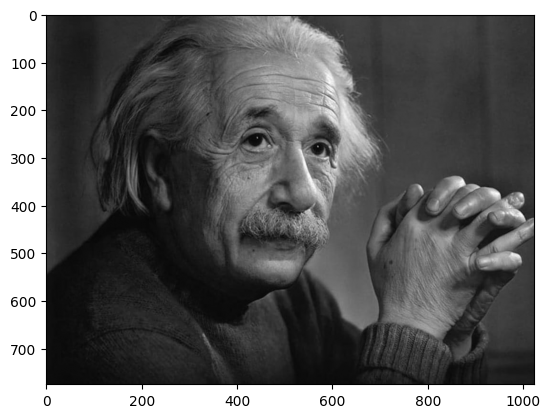

In [2]:
image = cv2.imread('data/einstein.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.mean(axis=2)
plt.imshow(image, cmap='gray')
image.shape

# Creating the directional gradients for an image

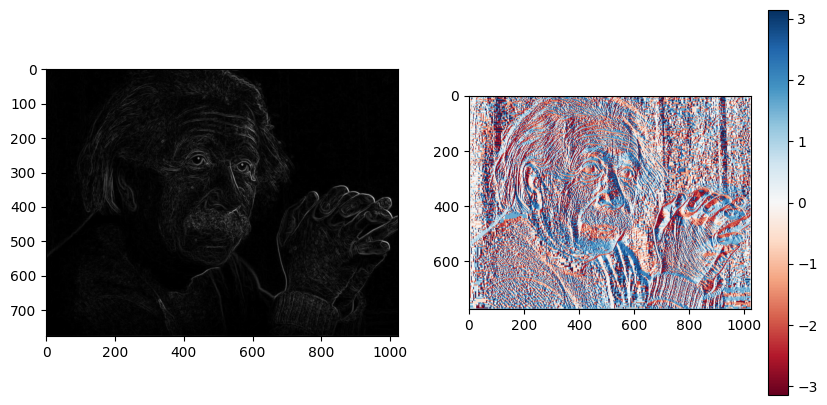

In [11]:
f_x, f_y    = img_utils.first_derivatives( image )
gradient    = jnp.sqrt( f_x**2 + f_y**2 )
orientation = jnp.atan2( f_y, f_x )


_, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.imshow( gradient,    cmap='gray' )
im = ax2.imshow( orientation, cmap='RdBu' )
plt.colorbar(im)

In [14]:
grad_flat   = gradient.flatten()
orient_flat = orientation.flatten()

index_orient = jnp.digitize( orient_flat, jnp.linspace(-jnp.pi, jnp.pi, 100) )

In [15]:
index_orient

Array([13, 22, 26, ..., 75, 72, 63], dtype=int32)